### Importing packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

alt.data_transformers.disable_max_rows()
##Altair color schemes: https://vega.github.io/vega/docs/schemes/

DataTransformerRegistry.enable('default')

# Dispatch Model Curves

## Old

In [3]:
## To run the dispatcher later for multiple cases
## (Reference) Cases to run the dispatcher for after valdiation:
power_PV = [0.01, 0.03, 0.05, 0.1, 0.2]
power_BESS = [1, 3, 5, 10, 20]
time_BESS = [0, 1, 2, 3, 4]
optimise_for=   ['Price', 'CO_2_eq']

# Create a new list using list comprehension
referenceCases = []
for i in range(len(power_PV)):
    for j in range(len(power_BESS)):
        for k in range(len(time_BESS)):
            referenceCases.append([power_PV[i], power_BESS[j], power_BESS[j] * time_BESS[k]])

In [4]:


#referenceCases

## Base case for testing/running the dispatcher
## Specifiying system size (as part of the global optimisation problem where the size components are our decision variables)
'''
Since production is modelled for 100MW, is is specified as a scaling factor, where:
0.01    1MW     ==  1 000 kW
0.1     10MW    == 10 000 kW
'''
p_solar=    0.1
## In kW
p_bess=     5000
## In kWh
t_bess=     4
e_bess=     p_bess * t_bess

In [5]:

price = pd.read_csv('Data/PriceCurve_SE4_2021.csv', sep = ';')
co2_pro = pd.read_csv('Data/production_emissions.csv')
co2_con = pd.read_csv('Data/consumption_emissions.csv')
pv = pd.read_csv('Data/oskarshamnpvprod.csv')
#load = pd.read_csv('Data/LoadCurveo.csv', sep = ',')
load = pd.read_csv('Data/LoadCurve_new.csv', sep=';')
load['Load'] = load['Load'].apply(lambda x: x.replace(',', '.')).astype(float)

data = load
data['Price'] = price['Grid_Price']
data['CO_2_eq'] = co2_pro['carbon_intensity_production_avg']
data['solar_PV'] = pv

#Converting from MW to kW
data['Load']= (data['Load'] * 1000)
#solar data is already in kW, but needs to be multiplied by the scaling factor
data['solar_PV']= (data['solar_PV']) * p_solar
data['Price']= (data['Price'] / 1000)
data['CO_2_eq']= (data['CO_2_eq'] / 1000)

data['Hour']= (data['Hour']).astype('int')

#data.head(48)
data= data.drop(data.index[0])
data= ((data.reset_index()).drop(columns= {'Hour'})).rename(columns= {'index': 'Hour'})
data.head(10)

,Hour,Load,Price,CO_2_eq,solar_PV
0,1,1008.0,0.02435,0.03748,0.000000
1,2,1086.0,0.02398,0.03729,0.000000
2,3,1128.0,0.02372,0.03722,0.000000
3,4,1032.0,0.02373,0.03750,0.000000
4,5,1014.0,0.02406,0.03776,0.000000
5,6,1008.0,0.02444,0.03865,0.000000
6,7,1044.0,0.02493,0.03893,0.000000
7,8,1104.0,0.02490,0.03883,0.000000
8,9,1056.0,0.02507,0.03872,0.000000
9,10,1050.0,0.02563,0.03875,0.001563


In [7]:
profile= pd.read_csv(
    'Results/Batch5/CaseB/results_econ.csv',
    sep= ',',
    index_col=False,
)
profile['SoC']= (profile['SoC']/20000)*100
profile

KeyError: 'SoC'

In [12]:
week=   25

In [ ]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
# Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
fig, ax1 = plt.subplots(figsize=(25,8))
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# Primary y-axis
ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Flows in kW')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
ax3 = ax1.twinx()
ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

ax2.set_ylabel('SoC', color='b')
ax2.tick_params(colors= 'b')
ax3.set_ylabel('Price', color= 'r')
ax3.tick_params(colors= 'r')

# Combine legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [ ]:
# Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
fig, ax1 = plt.subplots(figsize=(25,8))
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# Primary y-axis
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Flows in kW')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
ax3 = ax1.twinx()
ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
ax2.set_ylabel('SoC', color='b')
ax2.tick_params(colors= 'b')
ax3.set_ylabel('Price', color= 'r')
ax3.tick_params(colors= 'r')

# Combine legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [ ]:
profile= pd.read_csv(
    'Results/Batch5/CaseB/dispatch_10_5_4_price_new.csv',
    sep= ',',
    index_col=False,
)
profile['SoC']= (profile['SoC']/20000)*100
profile

In [ ]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

plt.stackplot(
    profile[4199:4225].Hour,
    profile[4199:4225].P_PV_to_Load,
    profile[4199:4225].P_PV_to_Grid,
    profile[4199:4225].P_PV_to_BESS,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
    ],
)
plt.plot(profile[4199:4225].Hour, profile[4199:4225].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
# Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
fig, ax1 = plt.subplots(figsize=(25,8))
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# Primary y-axis
ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Flows in kW')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
ax3 = ax1.twinx()
ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

ax2.set_ylabel('SoC', color='b')
ax2.tick_params(colors= 'b')
ax3.set_ylabel('Price', color= 'r')
ax3.tick_params(colors= 'r')

# Combine legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [ ]:
# Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
fig, ax1 = plt.subplots(figsize=(25,8))
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# Primary y-axis
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Flows in kW')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
ax3 = ax1.twinx()
ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
ax2.set_ylabel('SoC', color='b')
ax2.tick_params(colors= 'b')
ax3.set_ylabel('Price', color= 'r')
ax3.tick_params(colors= 'r')

# Combine legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [ ]:
for flow in ['P_BESS_to_Grid', 'P_BESS_to_Load']:
    profile[flow]=  profile[flow] * (-1)

In [ ]:
profile.describe()

In [ ]:
# Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
fig, ax1 = plt.subplots(figsize=(25,8))
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# Primary y-axis
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Flows in kW')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
ax3 = ax1.twinx()
ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
ax2.set_ylabel('SoC', color='b')
ax2.tick_params(colors= 'b')
ax3.set_ylabel('Price', color= 'r')
ax3.tick_params(colors= 'r')

# Combine legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.show()

In [ ]:
# Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
fig, ax1 = plt.subplots(figsize=(25,8))
title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# Primary y-axis
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Flows in kW')

# Create a twin Axes sharing the xaxis
ax3 = ax1.twinx()
ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
ax3.set_ylabel('Price', color= 'r')
ax3.tick_params(colors= 'r')

# Combine legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.show()

## After implementing arbitrage/Grid injection limit as a multiple of the Load

In [29]:
profile= pd.read_csv(
    'Results/Batch5/CaseB/price_8_1_2.csv',
    sep= ',',
    index_col=False,
)
profile['SoC']= (profile['SoC']/20000)*100

p_solar=    8
p_bess=     1
t_bess=     2
e_bess=     p_bess * t_bess

profile

,Hour,P_PV_to_Load,P_PV_to_BESS,P_PV_curtailment,P_PV_to_Grid,P_BESS_to_Load,P_BESS_to_Grid,P_Grid_to_Load,P_Grid_to_BESS,SoC,sum_power_flows
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,0.000000,15.0000,1020.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1008.0,0.000000,15.0000,1008.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,1086.0,0.000000,15.0000,1086.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,1128.0,3000.000000,27.3675,1128.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,1032.0,274.711947,28.5000,1032.0
...,...,...,...,...,...,...,...,...,...,...,...
8731,8731,0.0,0.0,0.0,0.0,0.0,0.0,2510.7,0.000000,1.5000,2510.7
8732,8732,0.0,0.0,0.0,0.0,0.0,0.0,2496.7,0.000000,1.5000,2496.7
8733,8733,0.0,0.0,0.0,0.0,0.0,0.0,2575.0,0.000000,1.5000,2575.0
8734,8734,0.0,0.0,0.0,0.0,0.0,0.0,2427.5,0.000000,1.5000,2427.5


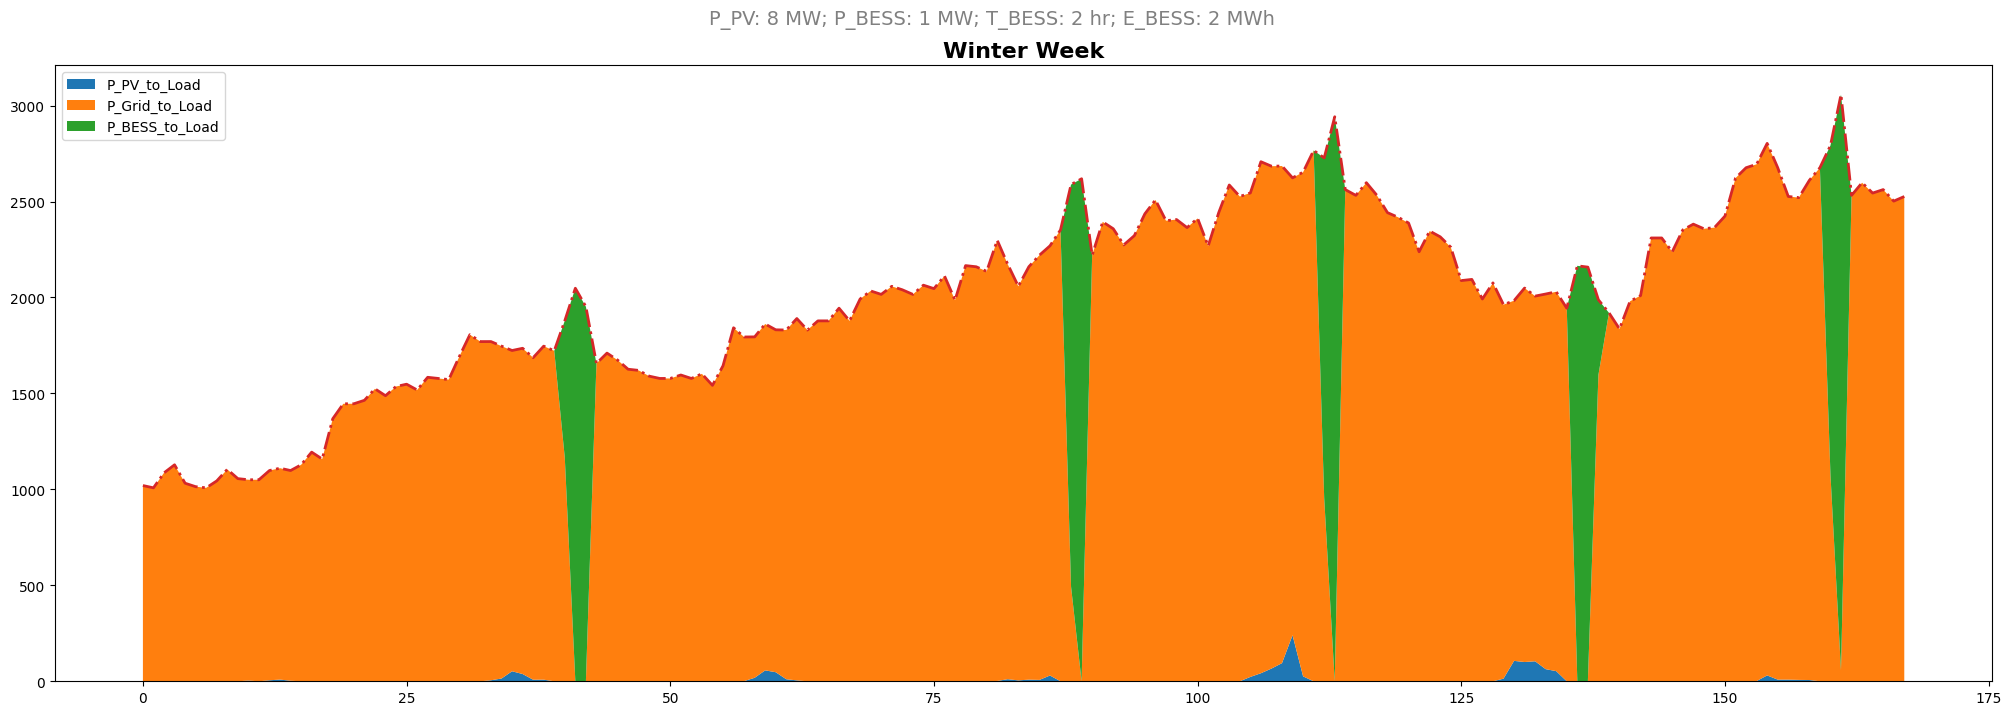

In [30]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


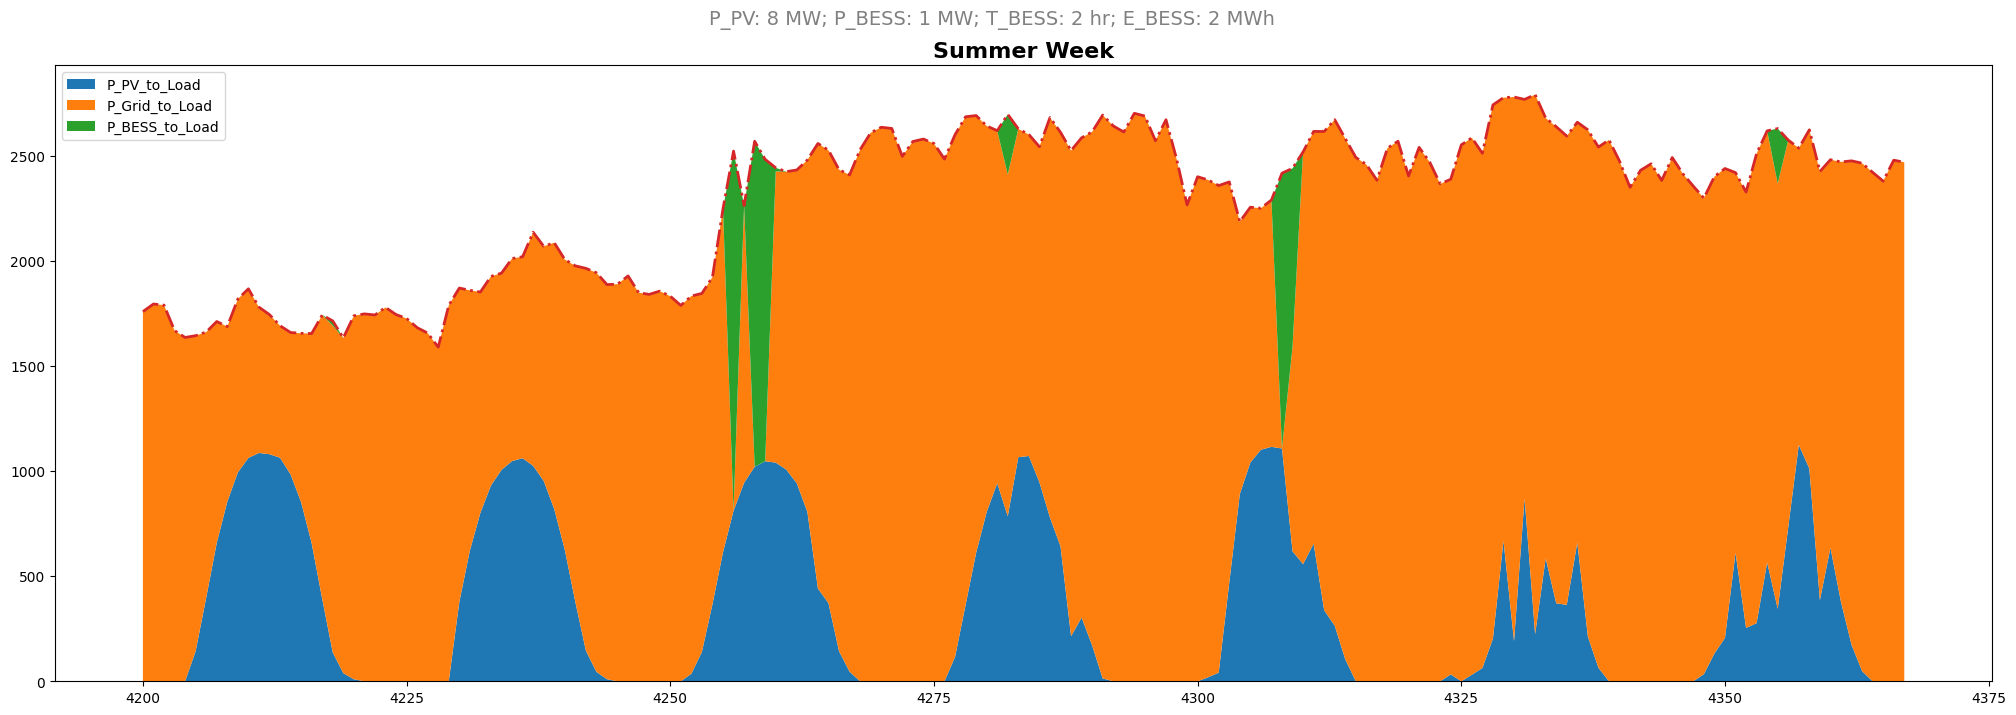

In [31]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


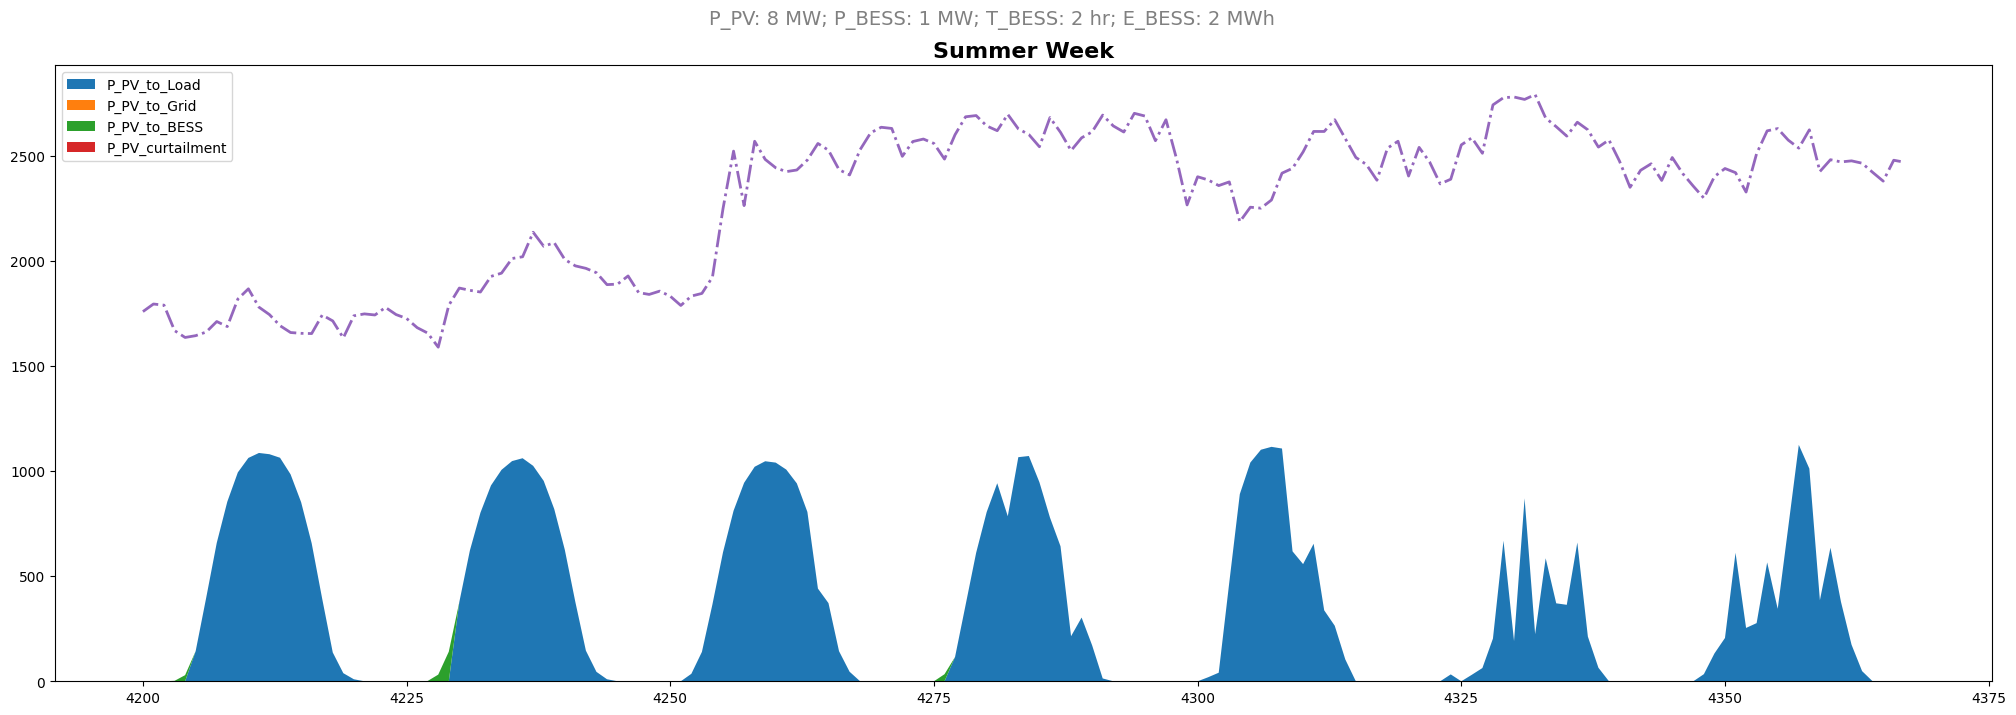

In [32]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


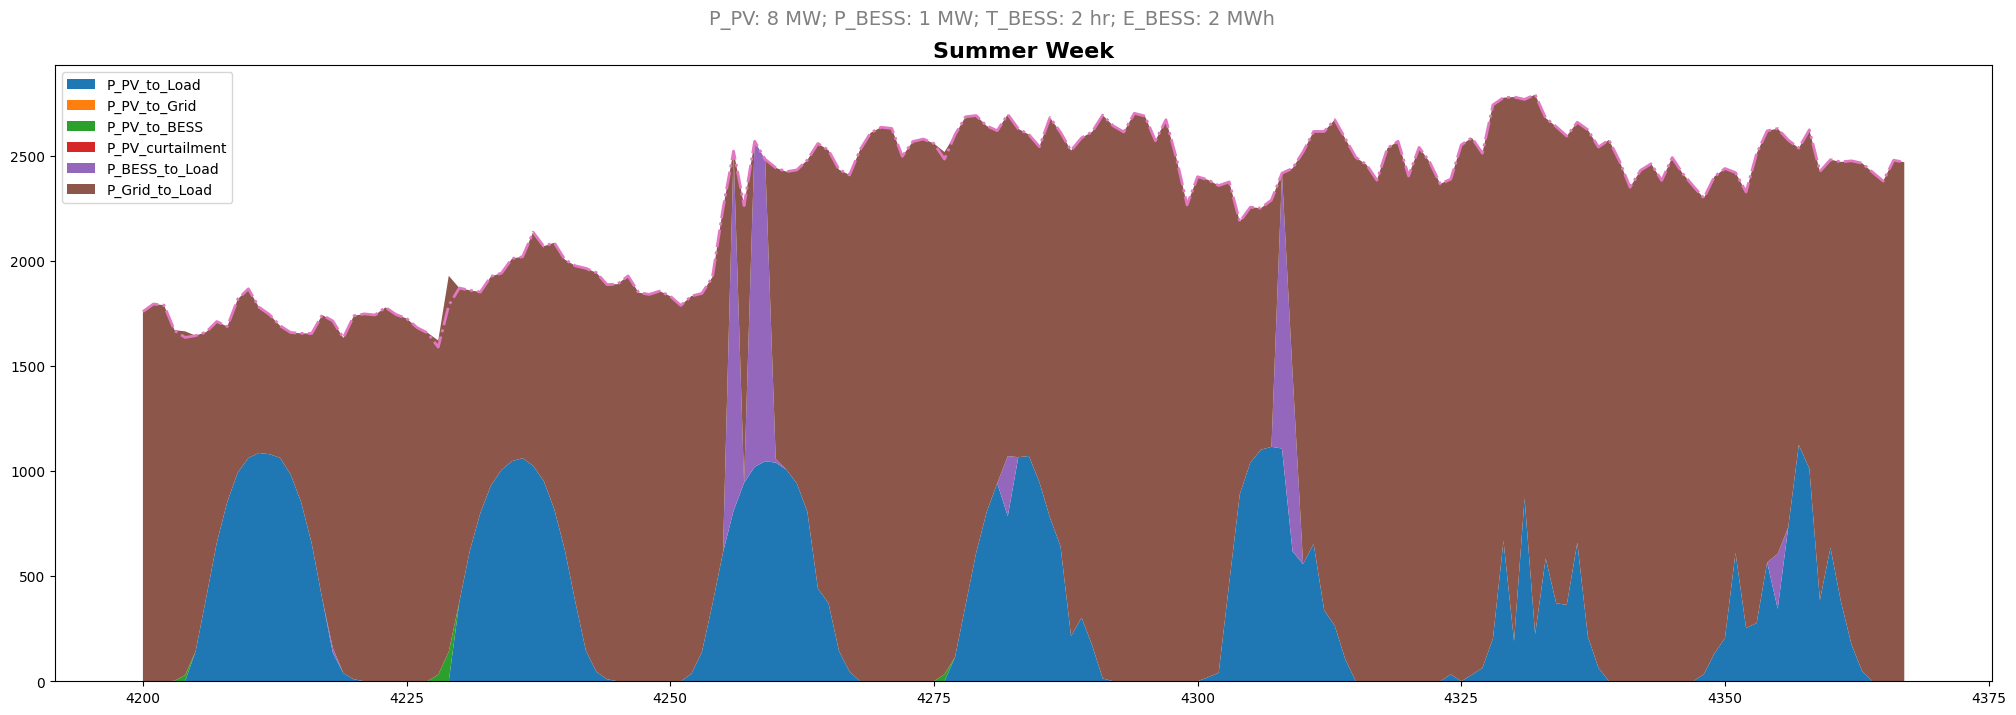

In [33]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


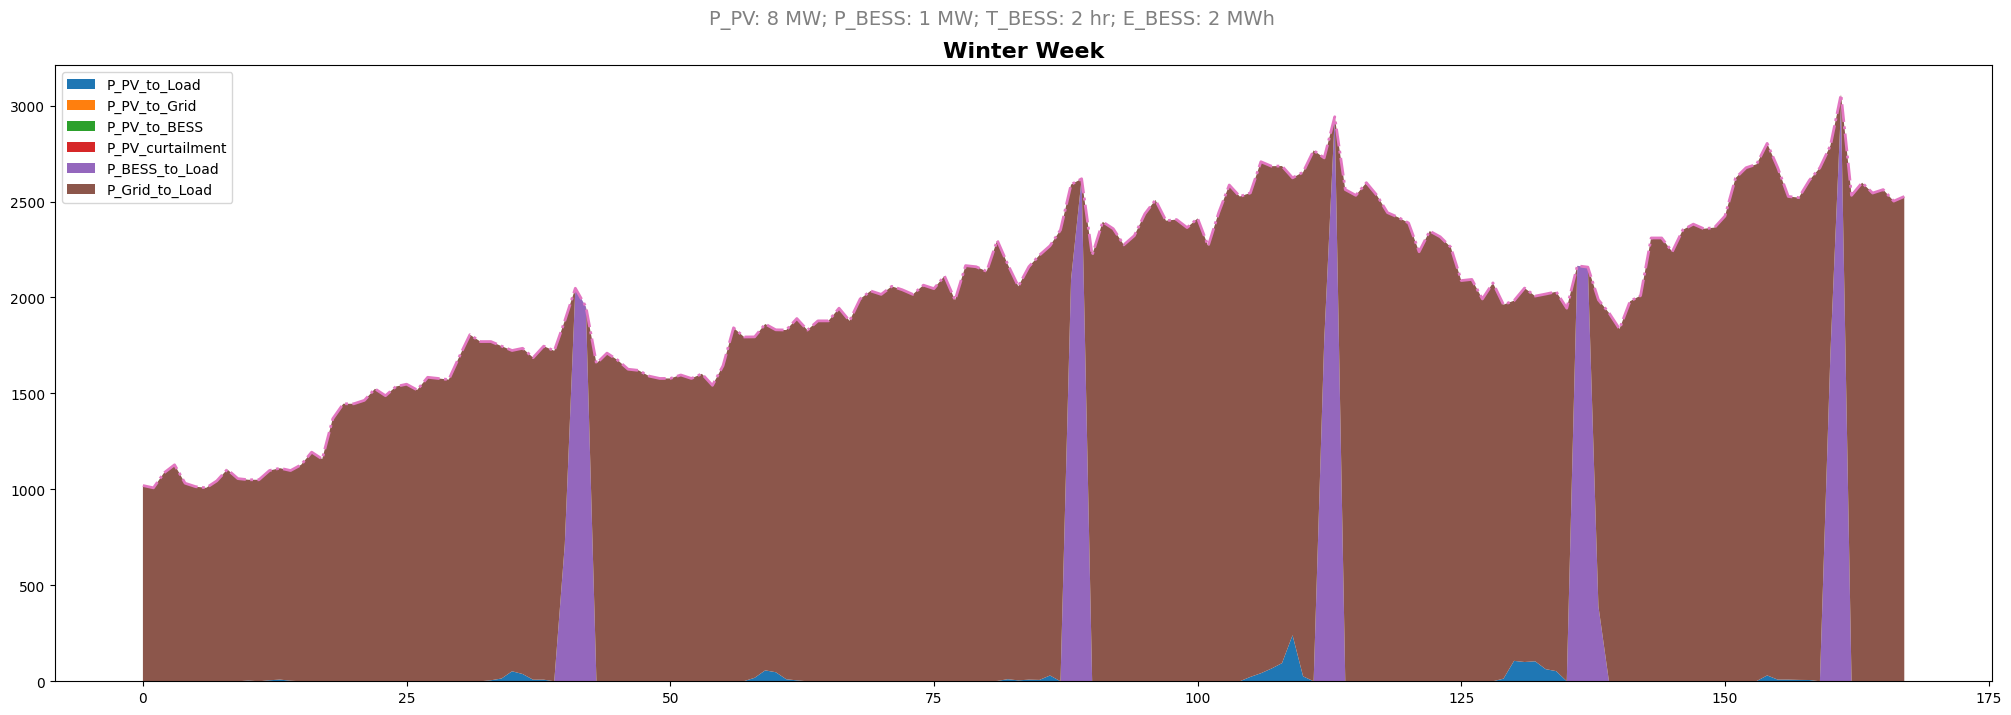

In [34]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_PV_to_Grid,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_PV_curtailment,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


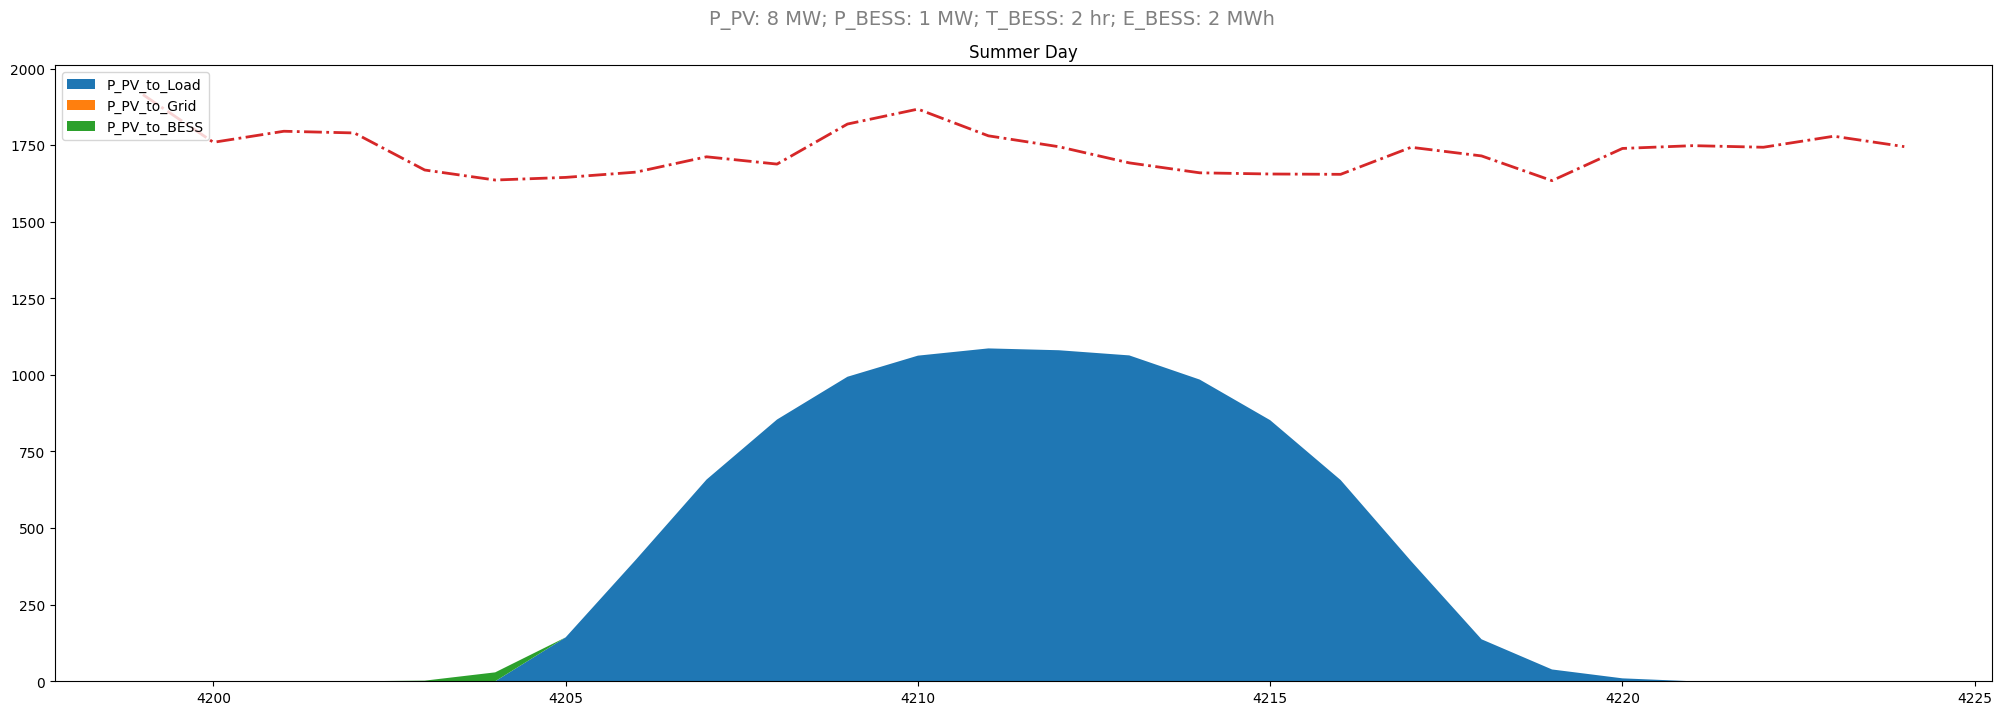

In [35]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Day')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[4199:4225].Hour,
    profile[4199:4225].P_PV_to_Load,
    profile[4199:4225].P_PV_to_Grid,
    profile[4199:4225].P_PV_to_BESS,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
    ],
)
plt.plot(profile[4199:4225].Hour, profile[4199:4225].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [36]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [37]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [38]:
for flow in ['P_BESS_to_Grid', 'P_BESS_to_Load']:
    profile[flow]=  profile[flow] * (-1)

In [39]:
profile.describe()

,Hour,P_PV_to_Load,P_PV_to_BESS,P_PV_curtailment,P_PV_to_Grid,P_BESS_to_Load,P_BESS_to_Grid,P_Grid_to_Load,P_Grid_to_BESS,SoC,sum_power_flows
count,8736.000000,8736.000000,8.736000e+03,8.736000e+03,8736.000000,8736.000000,8736.000000,8.736000e+03,8.736000e+03,8736.000000,8736.000000
mean,4367.500000,152.262254,8.175366e+00,-2.049874e-17,0.002614,-178.806432,-0.494360,2.012666e+03,2.330131e+02,12.361282,2343.734606
std,2522.010309,290.691402,6.175555e+01,5.961294e-15,0.244317,613.375566,32.670816,7.666091e+02,7.754532e+02,11.808617,473.355421
min,0.000000,0.000000,-3.447145e-13,-3.447145e-13,0.000000,-3000.000000,-2159.365500,-2.273737e-13,-5.515432e-13,1.500000,532.861368
25%,2183.750000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000,-0.000000,1.777744e+03,0.000000e+00,1.500000,2261.927661
50%,4367.500000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000,-0.000000,2.310000e+03,0.000000e+00,3.765000,2462.600000
75%,6551.250000,143.344020,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.530119e+03,0.000000e+00,28.500000,2610.850000
max,8735.000000,1292.515200,1.177313e+03,3.447145e-13,22.835448,-0.000000,-0.000000,3.038400e+03,3.000000e+03,28.500000,3354.500000


In [40]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [41]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [42]:
# fig, ax1 = plt.subplots(figsize=(25, 8))

# # Stackplot on the primary y-axis
# ax1.stackplot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )

# # Create a twin Axes sharing the x-axis
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# # Line plot on the secondary y-axis
# ax2.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     data[(week * 168):(week + 1) * 168].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )
# ax3.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis
# ax2.set_ylabel('Price', color='red')
# ax3.set_ylabel('Price', color='blue')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='upper left')

# plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# plt.show()


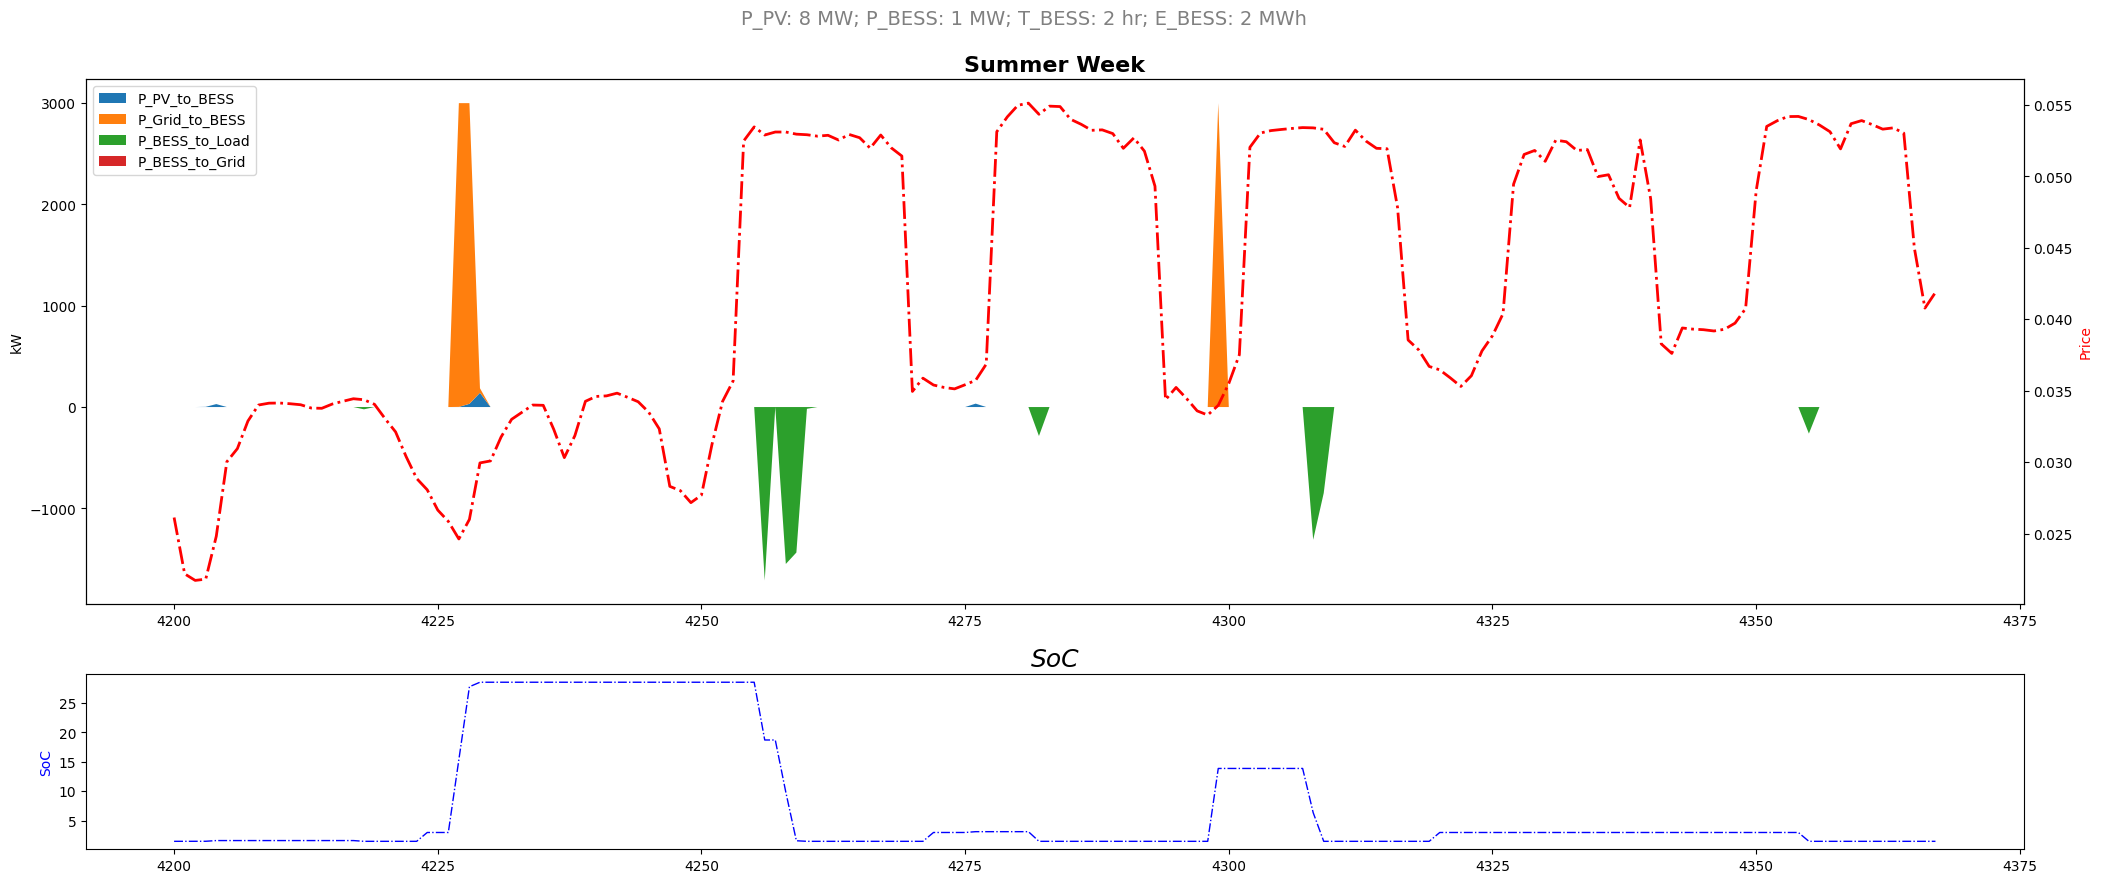

In [43]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Summer Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle='italic')

# Show the plot
plt.show()


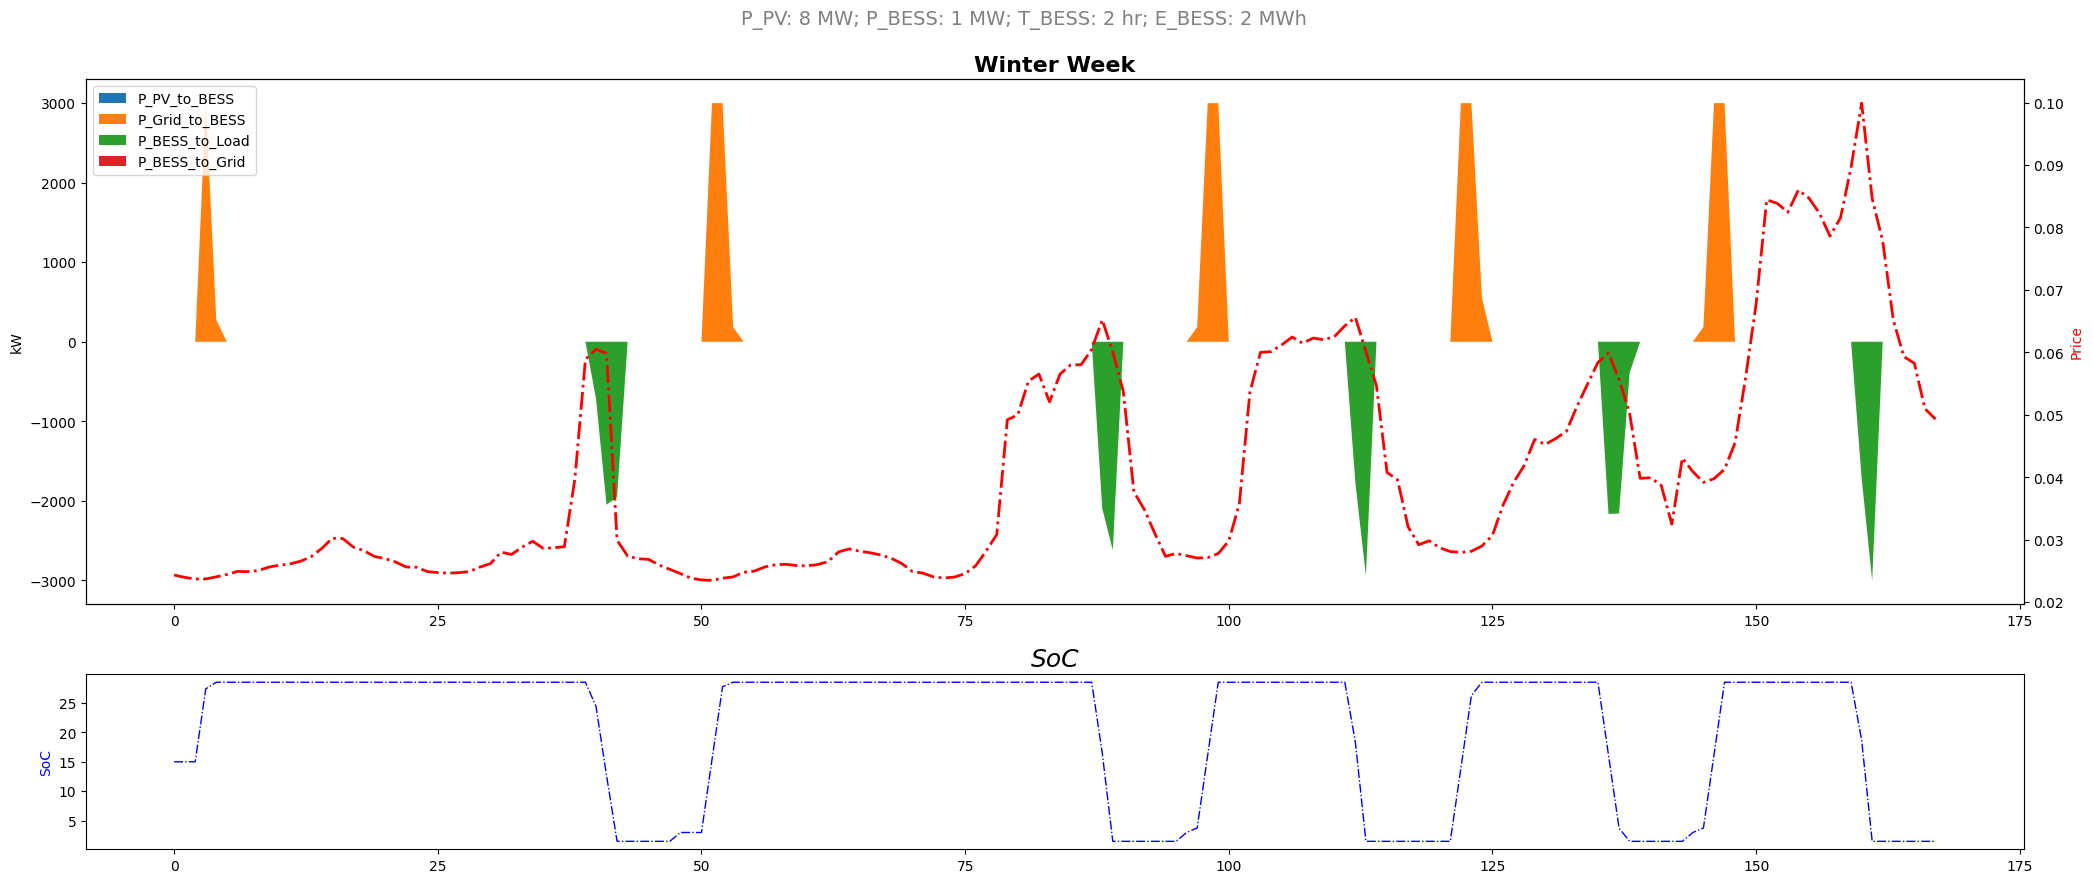

In [44]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_Grid_to_BESS,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[:168].Hour,
    data[:168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[:168].Hour,
    profile[:168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle= 'italic')

# Show the plot
plt.show()


## Zero storage

In [45]:
profile= pd.read_csv(
    'Results/Batch4/CaseB/dispatch_10_0_0_price_new.csv',
    sep= ',',
    index_col=False,
)
profile['SoC']= (profile['SoC']/20000)*100

p_solar=    10
p_bess=     0
t_bess=     0
e_bess=     p_bess * t_bess

#profile.info()
profile[47:96]

FileNotFoundError: [Errno 2] No such file or directory: 'Results/Batch4/CaseB/dispatch_10_0_0_price_new.csv'

In [ ]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_PV_to_Grid,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_PV_curtailment,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Day')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[4199:4225].Hour,
    profile[4199:4225].P_PV_to_Load,
    profile[4199:4225].P_PV_to_Grid,
    profile[4199:4225].P_PV_to_BESS,
    profile[4199:4225].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
plt.plot(profile[4199:4225].Hour, profile[4199:4225].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
for flow in ['P_BESS_to_Grid', 'P_BESS_to_Load']:
    profile[flow]=  profile[flow] * (-1)

In [ ]:
profile.describe()

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# fig, ax1 = plt.subplots(figsize=(25, 8))

# # Stackplot on the primary y-axis
# ax1.stackplot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )

# # Create a twin Axes sharing the x-axis
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# # Line plot on the secondary y-axis
# ax2.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     data[(week * 168):(week + 1) * 168].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )
# ax3.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis
# ax2.set_ylabel('Price', color='red')
# ax3.set_ylabel('Price', color='blue')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='upper left')

# plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Summer Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle='italic')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_Grid_to_BESS,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[:168].Hour,
    data[:168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[:168].Hour,
    profile[:168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle= 'italic')

# Show the plot
plt.show()


## Large PV, small storage with low throughput

In [ ]:
profile= pd.read_csv(
    'Results/Batch4/CaseB/dispatch_10_1_2_price_new.csv',
    sep= ',',
    index_col=False,
)
profile['SoC']= ((profile['SoC']/20000)*1000).astype('float')

p_solar=    10
p_bess=     1
t_bess=     2
e_bess=     p_bess * t_bess

#profile.info()
profile[47:96]

In [ ]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].sum_power_flows,
    label= 'Load',
    linestyle= 'dashdot',
    linewidth= 3,
    color= 'black'
)

plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_PV_to_Grid,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_PV_curtailment,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Day')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[4199:4225].Hour,
    profile[4199:4225].P_PV_to_Load,
    profile[4199:4225].P_PV_to_Grid,
    profile[4199:4225].P_PV_to_BESS,
    profile[4199:4225].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
plt.plot(profile[4199:4225].Hour, profile[4199:4225].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
for flow in ['P_BESS_to_Grid', 'P_BESS_to_Load']:
    profile[flow]=  profile[flow] * (-1)

In [ ]:
# profile[48:168]

In [ ]:
# profile.describe()

In [ ]:
# profile.info()

In [ ]:
# profile['P_BESS_to_Grid'][4217]

In [ ]:
def custom_format(value):
    if abs(value) < 1e-10:
        return 0
    else:
        return f'{value:.2f}'
    
profile['P_BESS_to_Grid'] = profile['P_BESS_to_Grid'].apply(custom_format)

In [ ]:
# profile['P_BESS_to_Grid'][4217]

In [ ]:
# profile.info()

In [ ]:
profile['P_BESS_to_Grid']= profile['P_BESS_to_Grid'].astype('float')
#profile.info()

In [ ]:
profile[4200:4250]

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# fig, ax1 = plt.subplots(figsize=(25, 8))

# # Stackplot on the primary y-axis
# ax1.stackplot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )

# # Create a twin Axes sharing the x-axis
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# # Line plot on the secondary y-axis
# ax2.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     data[(week * 168):(week + 1) * 168].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )
# ax3.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis
# ax2.set_ylabel('Price', color='red')
# ax3.set_ylabel('Price', color='blue')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='upper left')

# plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax5 = fig.add_subplot(gs[0])
ax5.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax5.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax6 = ax5.twinx()
ax6.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax6.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax7 = fig.add_subplot(gs[1], sharex=ax5)
ax7.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax7.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax5.set_title('Summer Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax7.set_title('SoC', fontsize= 18, fontstyle='italic')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_Grid_to_BESS,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[:168].Hour,
    data[:168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[:168].Hour,
    profile[:168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle= 'italic')

# Show the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# # Create a 2x1 grid of subplots with different heights
# fig = plt.figure(figsize=(25, 10))
# gs = GridSpec(2, 1, height_ratios=[3, 1])

# # Stackplot on the primary y-axis (top subplot)
# ax5 = fig.add_subplot(gs[0])
# ax5.stackplot(
#     profile[4300:4325].Hour,
#     profile[4300:4325].P_PV_to_BESS,
#     profile[4300:4325].P_Grid_to_BESS,
#     profile[4300:4325].P_BESS_to_Load,
#     profile[4300:4325].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )
# ax5.set_ylabel('kW', color='black')

# # Line plot on the secondary y-axis (top subplot)
# ax6 = ax5.twinx()
# ax6.plot(
#     profile[4300:4325].Hour,
#     data[4300:4325].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis (top subplot)
# ax6.set_ylabel('Price', color='red')

# # Create a twin Axes sharing the x-axis (bottom subplot)
# ax7 = fig.add_subplot(gs[1], sharex=ax5)
# ax7.plot(
#     profile[4300:4325].Hour,
#     profile[4300:4325].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis (bottom subplot)
# ax7.set_ylabel('SoC', color='blue')

# # Combine legends for the top subplot
# lines1, labels1 = ax5.get_legend_handles_labels()
# lines2, labels2 = ax6.get_legend_handles_labels()
# ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# # Set title
# #plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# ax5.set_title('Summer Week', fontsize=16, fontweight='bold')
# fig.suptitle('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr', x=0.5, y=0.95, fontsize=14, color='gray')
# ax7.set_title('SoC', fontsize= 18, fontstyle='italic')

# # Show the plot
# plt.show()


In [ ]:
# alt.Chart(profile[(week * 168):(week + 1) * 168]).mark_area().encode(
#     x=  'Hour:Q',
#     y=  'P_BESS_to_Grid:Q'
# )

In [ ]:
# alt.Chart(profile[4300: 4325]).mark_area().encode(
#     x=  'Hour:Q',
#     y=  'P_BESS_to_Grid:Q'
# )

In [ ]:
profile['ArbitrageFlow']=   profile['P_PV_to_Grid'] + profile['P_BESS_to_Grid']
profile.describe()

In [ ]:
# base = alt.Chart(
#     profile[(week - 1)*168:week*168],
#     title= alt.Title(
#         'BESS flows & SoC',
#         subtitle= 'P_PV= 10 MW, P_BESS= 1 MW, E_BESS= 2 MWh'
#     )
# ).encode(
#     alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
# ).properties(
#     height= 300,
#     width= 1200,
# )
# base2 = alt.Chart(data[24*168:25*168]).encode(
#     alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
# ).properties(
#     height= 300,
#     width= 1200,
# )

# profile_curves = base.mark_line().transform_fold(
#     fold = [
#         'P_BESS_to_Load',
#         'P_PV_to_BESS',
#         'P_BESS_to_Grid',
#         'P_Grid_to_BESS',
#         ],
#     as_ = ['System Profiles', 'Legend']
# ).encode(
#     alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
#     alt.Color(
#         'System Profiles:N',
#         legend= alt.Legend(
#             values= [
#         'P_BESS_to_Load',
#         'P_PV_to_BESS',
#         'P_BESS_to_Grid',
#         'P_Grid_to_BESS',
#         ],
#             #orient= 'right'
#         )
#     ).scale(
#         scheme= 'dark2',
#         #domain= (0, 50)
#     ),
# )
# system = base2.mark_line(color = 'blue').encode(
#     alt.Y(
#         'Load',
#         axis = alt.Axis(
#             title = '[MW]',
#             #titleColor = 'blue'
#         )
#     ).scale(domain= (-0.1, 8)),
# )
# soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
#     alt.Y(
#         'SoC',
#         axis = alt.Axis(
#             title = 'SoC [%]',
#             #titleColor = 'blue'
#         )
#     ).scale(domain= (0, 100)),
# )



# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

# #profile_curves

In [ ]:
base = alt.Chart(
    profile[(week - 1)*168:week*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )

).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[24*168:25*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[(week - 1)*168:week*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[24*168:25*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 4050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[week*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[week*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 4050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

## Edge case with implemented efficiency losses

In [ ]:
profile= pd.read_csv(
    'Results/Batch4/CaseB/dispatch_10_1_2_price_improved.csv',
    sep= ',',
    index_col=False,
)
profile['SoC']= ((profile['SoC']/20000)*1000).astype('float')

p_solar=    10
p_bess=     1
t_bess=     2
e_bess=     p_bess * t_bess

#profile.info()
#profile[47:96]

In [ ]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
#plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[:168].Hour, data[:168].Load, linestyle= 'dashdot', linewidth= 3, color= 'black')
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
#plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[(week * 168):(week + 1) * 168].Hour, data[(week * 168):(week + 1) * 168].Load, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(
    data[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Load,
    label= 'Load',
    linestyle= 'dashdot',
    linewidth= 3,
    color= 'black'
)

plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
#plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[(week * 168):(week + 1) * 168].Hour, data[(week * 168):(week + 1) * 168].Load, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_PV_to_Grid,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_PV_curtailment,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
#plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[:168].Hour, data[:168].Load, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Day')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[4199:4225].Hour,
    profile[4199:4225].P_PV_to_Load,
    profile[4199:4225].P_PV_to_Grid,
    profile[4199:4225].P_PV_to_BESS,
    profile[4199:4225].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment'
    ],
)
plt.plot(data[4199:4225].Hour, data[4199:4225].Load, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
for flow in ['P_BESS_to_Grid', 'P_BESS_to_Load']:
    profile[flow]=  profile[flow] * (-1)

In [ ]:
# profile[48:168]

In [ ]:
# profile.describe()

In [ ]:
# profile.info()

In [ ]:
# profile['P_BESS_to_Grid'][4217]

In [ ]:
def custom_format(value):
    if abs(value) < 1e-10:
        return 0
    else:
        return f'{value:.2f}'
    
profile['P_BESS_to_Grid'] = profile['P_BESS_to_Grid'].apply(custom_format)

In [ ]:
# profile['P_BESS_to_Grid'][4217]

In [ ]:
# profile.info()

In [ ]:
profile['P_BESS_to_Grid']= profile['P_BESS_to_Grid'].astype('float')
#profile.info()

In [ ]:
profile[4200:4250]

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# fig, ax1 = plt.subplots(figsize=(25, 8))

# # Stackplot on the primary y-axis
# ax1.stackplot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )

# # Create a twin Axes sharing the x-axis
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# # Line plot on the secondary y-axis
# ax2.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     data[(week * 168):(week + 1) * 168].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )
# ax3.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis
# ax2.set_ylabel('Price', color='red')
# ax3.set_ylabel('Price', color='blue')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='upper left')

# plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax5 = fig.add_subplot(gs[0])
ax5.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax5.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax6 = ax5.twinx()
ax6.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax6.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax7 = fig.add_subplot(gs[1], sharex=ax5)
ax7.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax7.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax5.set_title('Summer Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax7.set_title('SoC', fontsize= 18, fontstyle='italic')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_Grid_to_BESS,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[:168].Hour,
    data[:168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[:168].Hour,
    profile[:168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle= 'italic')

# Show the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# # Create a 2x1 grid of subplots with different heights
# fig = plt.figure(figsize=(25, 10))
# gs = GridSpec(2, 1, height_ratios=[3, 1])

# # Stackplot on the primary y-axis (top subplot)
# ax5 = fig.add_subplot(gs[0])
# ax5.stackplot(
#     profile[4300:4325].Hour,
#     profile[4300:4325].P_PV_to_BESS,
#     profile[4300:4325].P_Grid_to_BESS,
#     profile[4300:4325].P_BESS_to_Load,
#     profile[4300:4325].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )
# ax5.set_ylabel('kW', color='black')

# # Line plot on the secondary y-axis (top subplot)
# ax6 = ax5.twinx()
# ax6.plot(
#     profile[4300:4325].Hour,
#     data[4300:4325].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis (top subplot)
# ax6.set_ylabel('Price', color='red')

# # Create a twin Axes sharing the x-axis (bottom subplot)
# ax7 = fig.add_subplot(gs[1], sharex=ax5)
# ax7.plot(
#     profile[4300:4325].Hour,
#     profile[4300:4325].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis (bottom subplot)
# ax7.set_ylabel('SoC', color='blue')

# # Combine legends for the top subplot
# lines1, labels1 = ax5.get_legend_handles_labels()
# lines2, labels2 = ax6.get_legend_handles_labels()
# ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# # Set title
# #plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# ax5.set_title('Summer Week', fontsize=16, fontweight='bold')
# fig.suptitle('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr', x=0.5, y=0.95, fontsize=14, color='gray')
# ax7.set_title('SoC', fontsize= 18, fontstyle='italic')

# # Show the plot
# plt.show()


In [ ]:
# alt.Chart(profile[(week * 168):(week + 1) * 168]).mark_area().encode(
#     x=  'Hour:Q',
#     y=  'P_BESS_to_Grid:Q'
# )

In [ ]:
# alt.Chart(profile[4300: 4325]).mark_area().encode(
#     x=  'Hour:Q',
#     y=  'P_BESS_to_Grid:Q'
# )

In [ ]:
profile['ArbitrageFlow']=   profile['P_PV_to_Grid'] + profile['P_BESS_to_Grid']
profile.describe()

In [ ]:
# base = alt.Chart(
#     profile[(week - 1)*168:week*168],
#     title= alt.Title(
#         'BESS flows & SoC',
#         subtitle= 'P_PV= 10 MW, P_BESS= 1 MW, E_BESS= 2 MWh'
#     )
# ).encode(
#     alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
# ).properties(
#     height= 300,
#     width= 1200,
# )
# base2 = alt.Chart(data[24*168:25*168]).encode(
#     alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
# ).properties(
#     height= 300,
#     width= 1200,
# )

# profile_curves = base.mark_line().transform_fold(
#     fold = [
#         'P_BESS_to_Load',
#         'P_PV_to_BESS',
#         'P_BESS_to_Grid',
#         'P_Grid_to_BESS',
#         ],
#     as_ = ['System Profiles', 'Legend']
# ).encode(
#     alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
#     alt.Color(
#         'System Profiles:N',
#         legend= alt.Legend(
#             values= [
#         'P_BESS_to_Load',
#         'P_PV_to_BESS',
#         'P_BESS_to_Grid',
#         'P_Grid_to_BESS',
#         ],
#             #orient= 'right'
#         )
#     ).scale(
#         scheme= 'dark2',
#         #domain= (0, 50)
#     ),
# )
# system = base2.mark_line(color = 'blue').encode(
#     alt.Y(
#         'Load',
#         axis = alt.Axis(
#             title = '[MW]',
#             #titleColor = 'blue'
#         )
#     ).scale(domain= (-0.1, 8)),
# )
# soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
#     alt.Y(
#         'SoC',
#         axis = alt.Axis(
#             title = 'SoC [%]',
#             #titleColor = 'blue'
#         )
#     ).scale(domain= (0, 100)),
# )



# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

# #profile_curves

In [ ]:
base = alt.Chart(
    profile[:168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )

).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (0, 170))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[:168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (0, 170))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[(week - 1)*168:week*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )

).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[24*168:25*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[(week - 1)*168:week*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[24*168:25*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 4050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[week*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[week*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 4050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

## Edge case with constrained charge/discharge cycle

In [ ]:
profile= pd.read_csv(
    #'Results/Batch4/CaseB/dispatch_10_1_2_price_improved.csv',
    #'Results/Batch4/CaseB/dispatch_10_1_2_price_limit.csv',
    'Results/Batch5/CaseB/co2_3_1_2.csv',
    #'Results/Batch5/CaseB/price_3_1_2.csv',

    sep= ',',
    index_col=False,
)
#profile['SoC']= ((profile['SoC']/20000)*1000).astype('float')
profile['SoC']= ((profile['SoC']/6000)*100).astype('float')

# p_solar=    10
# p_bess=     1
# t_bess=     2
# e_bess=     p_bess * t_bess
p_solar=    9
p_bess=     3
t_bess=     2
e_bess=     p_bess * t_bess

efficiency_charge=      0.98
efficiency_discharge=   0.96
efficiency_inverter=    0.97

week= 24

#profile.info()
#profile[47:96]

In [ ]:
profile['P_PV_to_Grid']=    profile['P_PV_to_Grid']     * efficiency_inverter
profile['P_PV_to_Load']=    profile['P_PV_to_Load']     * efficiency_inverter
profile['P_PV_to_BESS']=    profile['P_PV_to_BESS']     * efficiency_charge     * efficiency_inverter
profile['P_BESS_to_Grid']=  profile['P_BESS_to_Grid']   * efficiency_discharge  * efficiency_inverter
profile['P_BESS_to_Load']=  profile['P_BESS_to_Load']   * efficiency_discharge  * efficiency_inverter
profile['P_Grid_to_BESS']=  profile['P_Grid_to_BESS']   * efficiency_charge     * efficiency_inverter
#profile

In [ ]:
fig= plt.figure(
    figsize= (25,8),
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_Grid_to_Load,
    profile[:168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
#plt.plot(profile[:168].Hour, profile[:168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[:168].Hour, data[:168].Load, linestyle= 'dashdot', linewidth= 3, color= 'black')
plt.legend(loc='upper left')


In [ ]:
dispatch_with_bars= pd.melt(
    profile[:168],
    id_vars= ['Hour'],
    value_vars= [
        'P_PV_to_Load',
        'P_BESS_to_Load',
        'P_Grid_to_Load',
    ],
    var_name= 'flow',
    value_name= 'value'
)
color_mapping= {
    'P_PV_to_Load': 'orange',
    'P_BESS_to_Load': 'blue',
    'P_Grid_to_Load': 'red',
}



alt.Chart(
    dispatch_with_bars,
    title= alt.Title(
        'Winter Week',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).mark_bar().encode(
    x= alt.X('Hour:Q'),
    y= alt.Y('value:Q'),
    color= alt.Color(
        'flow:N',
        scale= alt.Scale(
            domain= list(color_mapping.keys()),
            range= list(color_mapping.values())
        )
    )
).properties(
    height= 300,
    width= 1200
)

In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_Grid_to_Load',
        'P_BESS_to_Load',
    ],
)
#plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[(week * 168):(week + 1) * 168].Hour, data[(week * 168):(week + 1) * 168].Load, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
#title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
#fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

plt.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
    profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
plt.plot(
    data[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Load,
    label= 'Load',
    linestyle= 'dashdot',
    linewidth= 3,
    color= 'black'
)

plt.legend(loc='upper left')


In [ ]:
profile= profile[:6200]
profile.info()
profile

In [ ]:
columns_of_interest = ['Hour', 'P_PV_to_Load', 'P_PV_to_Grid', 'P_PV_to_BESS', 'P_PV_curtailment', 'P_BESS_to_Load', 'P_Grid_to_Load']
subset_data_2 = profile[columns_of_interest]

subset_data_2= subset_data_2[4029:4201]
subset_data_2.info()

In [ ]:
alt.Chart(subset_data_2).mark_bar().encode(
    x= 'Hour:Q',
    y= 'P_PV_to_Load:Q'
)

In [ ]:
base= alt.Chart(subset_data_2).mark_area().encode(
    x= alt.X(
        'Hour:Q'
    )
)

pv2load= base.encode(
    y= alt.Y(
        'P_PV_to_Load:Q',
        axis= alt.Axis(
            title= 'Power [MW]'
        )
    ),
    color= alt.Color(
        'P_PV_to_Load:O'
    )
)
pv2grid= base.encode(
    y= alt.Y(
        'P__to_Grid:Q',
        axis= alt.Axis(
            title= 'Power [MW]'
        )
    ),
    color= alt.Color(
        'P__to_Grid:O'
    )
)
pv2bess= base.encode(
    y= alt.Y(
        'P_PV_to_BESS:Q',
        axis= alt.Axis(
            title= 'Power [MW]'
        )
    ),
    color= alt.Color(
        'P_PV_to_BESS:O'
    )
)
pv2curtailment= base.encode(
    y= alt.Y(
        'P_PV_curtailment:Q',
        axis= alt.Axis(
            title= 'Power [MW]'
        )
    ),
    color= alt.Color(
        'P_PV_curtailment:O'
    )
)
bess2load= base.encode(
    y= alt.Y(
        'P_BESS_to_Load:Q',
        axis= alt.Axis(
            title= 'Power [MW]'
        )
    ),
    color= alt.Color(
        'P_BESS_to_Load:O'
    )
)
grid2load= base.encode(
    y= alt.Y(
        'P_Grid_to_Load:Q',
        axis= alt.Axis(
            title= 'Power [MW]'
        )
    ),
    color= alt.Color(
        'P_Grid_to_Load:O'
    )
)

In [ ]:
alt.layer(
    pv2load,
    pv2grid,
    pv2bess,
    pv2curtailment,
    bess2load,
    grid2load
)

In [ ]:
# Select only the columns of interest
# columns_of_interest = [
#     'Hour',
#     'P_PV_to_Load',
#     'P_PV_to_Grid',
#     'P_PV_to_BESS',
#     'P_PV_curtailment',
#     'P_BESS_to_Load',
#     'P_Grid_to_Load'
# ]
# subset_data_2 = profile[columns_of_interest]

# Melt the DataFrame to long format
melted_data = subset_data_2.melt(id_vars=['Hour'], var_name='source', value_name='value')

alt.Chart(melted_data[4030:4201]).mark_area().encode(
    x= alt.X('Hour'),
    y= alt.Y(
        'value:Q', stack= 'zero'
    ),
    color= alt.Color(
        'source:N'
    )
)

In [ ]:
# fig= plt.figure(
#     figsize= (25,8)
# )
# title= plt.title('Summer Week', fontsize= 16, fontweight= 'bold')
# #ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
# fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

# plt.stackplot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_Load,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_Grid,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_PV_curtailment,
#     labels=[
#         'P_PV_to_Load',
#         'P_PV_to_Grid',
#         'P_PV_to_BESS',
#         'P_PV_curtailment'
#     ],
# )
# #plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
# plt.plot(data[(week * 168):(week + 1) * 168].Hour, data[(week * 168):(week + 1) * 168].Load, linestyle= 'dashdot', linewidth= 2)
# plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Winter Week', fontsize= 16, fontweight= 'bold')
#ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
plt.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_Load,
    profile[:168].P_PV_to_Grid,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_PV_curtailment,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_Grid_to_Load,
    labels=[
        'P_PV_to_Load',
        'P_PV_to_Grid',
        'P_PV_to_BESS',
        'P_PV_curtailment',
        'P_BESS_to_Load',
        'P_Grid_to_Load'        
    ],
)
#plt.plot(profile[(week * 168):(week + 1) * 168].Hour, profile[(week * 168):(week + 1) * 168].sum_power_flows, linestyle= 'dashdot', linewidth= 2)
plt.plot(data[:168].Hour, data[:168].Load, linestyle= 'dashdot', linewidth= 2)
plt.legend(loc='upper left')


In [ ]:
fig= plt.figure(
    figsize= (25,8)
)
title= plt.title('Summer Day')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')

custom_colors = [
    'yellow',
    'blue',
    'purple',
    'green',
    'orange',
    'red',
]
plt.stackplot(
    profile[4199:4225].Hour,
    profile[4199:4225].P_PV_to_Load,
    profile[4199:4225].P_BESS_to_Load,
    profile[4199:4225].P_Grid_to_Load,
    profile[4199:4225].P_PV_to_BESS,
    profile[4199:4225].P_PV_to_Grid,
    profile[4199:4225].P_PV_curtailment,
    labels=[
        'P_PV_to_Load',
        'P_BESS_to_Load',
        'P_Grid_to_Load',
        'P_PV_to_BESS',
        'P_PV_to_Grid',
        'P_PV_curtailment',
    ],
    colors= custom_colors
)
plt.plot(data[4199:4225].Hour, data[4199:4225].Load, linestyle= 'dashdot', linewidth= 3, color= 'black')
plt.legend(loc='upper left')


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[:168]['Hour'], profile[:168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[:168]['Hour'], profile[:168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[:168]['Hour'], data[:168]['Price'], 'red', label='Price', linestyle= ':')

# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.show()


In [ ]:
for flow in ['P_BESS_to_Grid', 'P_BESS_to_Load']:
    profile[flow]=  profile[flow] * (-1)

In [ ]:
# profile[48:168]

In [ ]:
# profile.describe()

In [ ]:
# profile.info()

In [ ]:
# profile['P_BESS_to_Grid'][4217]

In [ ]:
def custom_format(value):
    if abs(value) < 1e-10:
        return 0
    else:
        return f'{value:.2f}'
    
profile['P_BESS_to_Grid'] = profile['P_BESS_to_Grid'].apply(custom_format)

In [ ]:
# profile['P_BESS_to_Grid'][4217]

In [ ]:
# profile.info()

In [ ]:
profile['P_BESS_to_Grid']= profile['P_BESS_to_Grid'].astype('float')
#profile.info()

In [ ]:
#profile[4200:4250]

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax2 = ax1.twinx()
# ax2.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['SoC'], 'b', label='SoC', linestyle= 'dashdot')
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax2.set_ylabel('SoC', color='b')
# ax2.tick_params(colors= 'b')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# # Assuming 'Hour', 'P_PV_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid', 'P_Grid_to_BESS', 'SoC' are columns in profile
# fig, ax1 = plt.subplots(figsize=(25,8))
# title= plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')

# # Primary y-axis
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_PV_to_BESS'], label='P_PV_to_BESS')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Load'], label='P_BESS_to_Load')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_BESS_to_Grid'], label='P_BESS_to_Grid')
# ax1.plot(profile[(week * 168):(week + 1) * 168]['Hour'], profile[(week * 168):(week + 1) * 168]['P_Grid_to_BESS'], label='P_Grid_to_BESS')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Flows in kW')

# # Create a twin Axes sharing the xaxis
# ax3 = ax1.twinx()
# ax3.plot(data[(week * 168):(week + 1) * 168]['Hour'], data[(week * 168):(week + 1) * 168]['Price'], 'red', label='Price', linestyle= ':')
# ax3.set_ylabel('Price', color= 'r')
# ax3.tick_params(colors= 'r')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# plt.show()

In [ ]:
# fig, ax1 = plt.subplots(figsize=(25, 8))

# # Stackplot on the primary y-axis
# ax1.stackplot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
#     profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )

# # Create a twin Axes sharing the x-axis
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# # Line plot on the secondary y-axis
# ax2.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     data[(week * 168):(week + 1) * 168].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )
# ax3.plot(
#     profile[(week * 168):(week + 1) * 168].Hour,
#     profile[(week * 168):(week + 1) * 168].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis
# ax2.set_ylabel('Price', color='red')
# ax3.set_ylabel('Price', color='blue')

# # Combine legends for both axes
# lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='upper left')

# plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax5 = fig.add_subplot(gs[0])
ax5.stackplot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].P_PV_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_Grid_to_BESS,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Load,
    profile[(week * 168):(week + 1) * 168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax5.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax6 = ax5.twinx()
ax6.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    data[(week * 168):(week + 1) * 168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax6.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax7 = fig.add_subplot(gs[1], sharex=ax5)
ax7.plot(
    profile[(week * 168):(week + 1) * 168].Hour,
    profile[(week * 168):(week + 1) * 168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax7.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax5.set_title('Summer Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax7.set_title('SoC', fontsize= 18, fontstyle='italic')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 2x1 grid of subplots with different heights
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1])

# Stackplot on the primary y-axis (top subplot)
ax1 = fig.add_subplot(gs[0])
ax1.stackplot(
    profile[:168].Hour,
    profile[:168].P_PV_to_BESS,
    profile[:168].P_Grid_to_BESS,
    profile[:168].P_BESS_to_Load,
    profile[:168].P_BESS_to_Grid,
    labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
)
ax1.set_ylabel('kW', color='black')

# Line plot on the secondary y-axis (top subplot)
ax2 = ax1.twinx()
ax2.plot(
    profile[:168].Hour,
    data[:168].Price,
    linestyle='dashdot',
    linewidth=2,
    color='red'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (top subplot)
ax2.set_ylabel('Price', color='red')

# Create a twin Axes sharing the x-axis (bottom subplot)
ax3 = fig.add_subplot(gs[1], sharex=ax1)
ax3.plot(
    profile[:168].Hour,
    profile[:168].SoC,
    linestyle='dashdot',
    linewidth=1,
    color='blue'  # Specify the color for the line plot
)

# Set y-axis label for the secondary y-axis (bottom subplot)
ax3.set_ylabel('SoC', color='blue')

# Combine legends for the top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
#plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
ax1.set_title('Winter Week', fontsize=16, fontweight='bold')
fig.suptitle(f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh', x=0.5, y=0.95, fontsize=14, color='gray')
ax3.set_title('SoC', fontsize= 18, fontstyle= 'italic')

# Show the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# # Create a 2x1 grid of subplots with different heights
# fig = plt.figure(figsize=(25, 10))
# gs = GridSpec(2, 1, height_ratios=[3, 1])

# # Stackplot on the primary y-axis (top subplot)
# ax5 = fig.add_subplot(gs[0])
# ax5.stackplot(
#     profile[4300:4325].Hour,
#     profile[4300:4325].P_PV_to_BESS,
#     profile[4300:4325].P_Grid_to_BESS,
#     profile[4300:4325].P_BESS_to_Load,
#     profile[4300:4325].P_BESS_to_Grid,
#     labels=['P_PV_to_BESS', 'P_Grid_to_BESS', 'P_BESS_to_Load', 'P_BESS_to_Grid']
# )
# ax5.set_ylabel('kW', color='black')

# # Line plot on the secondary y-axis (top subplot)
# ax6 = ax5.twinx()
# ax6.plot(
#     profile[4300:4325].Hour,
#     data[4300:4325].Price,
#     linestyle='dashdot',
#     linewidth=2,
#     color='red'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis (top subplot)
# ax6.set_ylabel('Price', color='red')

# # Create a twin Axes sharing the x-axis (bottom subplot)
# ax7 = fig.add_subplot(gs[1], sharex=ax5)
# ax7.plot(
#     profile[4300:4325].Hour,
#     profile[4300:4325].SoC,
#     linestyle='dashdot',
#     linewidth=1,
#     color='blue'  # Specify the color for the line plot
# )

# # Set y-axis label for the secondary y-axis (bottom subplot)
# ax7.set_ylabel('SoC', color='blue')

# # Combine legends for the top subplot
# lines1, labels1 = ax5.get_legend_handles_labels()
# lines2, labels2 = ax6.get_legend_handles_labels()
# ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# # Set title
# #plt.title('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr')
# ax5.set_title('Summer Week', fontsize=16, fontweight='bold')
# fig.suptitle('P_PV: 10 MW; P_BESS: 5 MW; T_BESS: 4 hr', x=0.5, y=0.95, fontsize=14, color='gray')
# ax7.set_title('SoC', fontsize= 18, fontstyle='italic')

# # Show the plot
# plt.show()


In [ ]:
# alt.Chart(profile[(week * 168):(week + 1) * 168]).mark_area().encode(
#     x=  'Hour:Q',
#     y=  'P_BESS_to_Grid:Q'
# )

In [ ]:
# alt.Chart(profile[4300: 4325]).mark_area().encode(
#     x=  'Hour:Q',
#     y=  'P_BESS_to_Grid:Q'
# )

In [ ]:
profile['ArbitrageFlow']=   profile['P_PV_to_Grid'] + profile['P_BESS_to_Grid']
profile.describe()

In [ ]:
# base = alt.Chart(
#     profile[(week - 1)*168:week*168],
#     title= alt.Title(
#         'BESS flows & SoC',
#         subtitle= 'P_PV= 10 MW, P_BESS= 1 MW, E_BESS= 2 MWh'
#     )
# ).encode(
#     alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
# ).properties(
#     height= 300,
#     width= 1200,
# )
# base2 = alt.Chart(data[24*168:25*168]).encode(
#     alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
# ).properties(
#     height= 300,
#     width= 1200,
# )

# profile_curves = base.mark_line().transform_fold(
#     fold = [
#         'P_BESS_to_Load',
#         'P_PV_to_BESS',
#         'P_BESS_to_Grid',
#         'P_Grid_to_BESS',
#         ],
#     as_ = ['System Profiles', 'Legend']
# ).encode(
#     alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
#     alt.Color(
#         'System Profiles:N',
#         legend= alt.Legend(
#             values= [
#         'P_BESS_to_Load',
#         'P_PV_to_BESS',
#         'P_BESS_to_Grid',
#         'P_Grid_to_BESS',
#         ],
#             #orient= 'right'
#         )
#     ).scale(
#         scheme= 'dark2',
#         #domain= (0, 50)
#     ),
# )
# system = base2.mark_line(color = 'blue').encode(
#     alt.Y(
#         'Load',
#         axis = alt.Axis(
#             title = '[MW]',
#             #titleColor = 'blue'
#         )
#     ).scale(domain= (-0.1, 8)),
# )
# soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
#     alt.Y(
#         'SoC',
#         axis = alt.Axis(
#             title = 'SoC [%]',
#             #titleColor = 'blue'
#         )
#     ).scale(domain= (0, 100)),
# )



# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

# #profile_curves

In [ ]:
base = alt.Chart(
    profile[:168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )

).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (0, 170))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[:168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (0, 170))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[:168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )

).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (0, 170))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[:168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (0, 170))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_bar().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
price = base2.mark_line(color = 'red').encode(
    alt.Y(
        'Price',
        axis = alt.Axis(
            title = '',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 80)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

#upper= alt.layer(profile_curves, price).resolve_axis('independent')
upper= alt.layer(
    profile_curves,
    price.encode(
        alt.Y('Price', axis=alt.Axis(title='Price [$]', titleColor='red'))
    )).resolve_scale(y= 'independent')
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[(week - 1)*168:week*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )

).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[24*168:25*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
data.info()

In [ ]:
base = alt.Chart(
    profile[(week)*168:(week + 1)*168],
    # title= alt.Title(
    #     'BESS flows & SoC',
    #     subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    # )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_bar().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-3600, 3600)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
price = base2.mark_line(color = 'red').encode(
    alt.Y(
        'Price',
        axis = alt.Axis(
            title = '',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 80)),
)
co2 = base2.mark_line(color = 'green').encode(
    alt.Y(
        'CO_2_eq',
        axis = alt.Axis(
            title = '',
            #titleColor = 'blue'
        )
    )#.scale(domain= (-0.1, 80)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

#upper= alt.layer(profile_curves, price).resolve_axis('independent')
upper= alt.layer(
    profile_curves,
    # price.mark_line(color= 'red', strokeDash= (5, 5)).encode(
    #     alt.Y('Price', axis=alt.Axis(title='Price [EUR/kWh]', titleColor='red'))
    # ),
    co2.mark_line(color= 'green', strokeDash= (5, 5)).encode(
        alt.Y('CO_2_eq', axis=alt.Axis(title='CO2eq Intensity of Electricity Production [gCO2eq/kWh]', titleColor='green')).scale(domain= (0.03, 0.04))
    )
).resolve_scale(y= 'independent')
lower= soc
upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[(week)*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[24*168:25*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4030, 4200))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 4050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[week*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 1050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

In [ ]:
base = alt.Chart(
    profile[week*168:(week + 1)*168],
    title= alt.Title(
        'BESS flows & SoC',
        subtitle= f'P_PV: {p_solar} MW; P_BESS: {p_bess} MW; T_BESS: {t_bess} hr; E_BESS: {e_bess} MWh'
    )
).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)
base2 = alt.Chart(data[week*168:(week + 1)*168]).encode(
    alt.X('Hour:Q', axis = alt.Axis(title = 'Hour in year', format= 'd')).scale(domain= (4200, 4370))
).properties(
    height= 300,
    width= 1200,
)

profile_curves = base.mark_area().transform_fold(
    fold = [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
    as_ = ['System Profiles', 'Legend']
).encode(
    alt.Y('Legend:Q', axis = alt.Axis(title = '[MW]')).scale(domain= (-1050, 4050)),
    alt.Color(
        'System Profiles:N',
        legend= alt.Legend(
            values= [
        'P_BESS_to_Load',
        'P_PV_to_BESS',
        'P_BESS_to_Grid',
        'P_Grid_to_BESS',
        'P_PV_to_Grid'
        ],
            #orient= 'right'
        )
    ).scale(
        scheme= 'dark2',
        #domain= (0, 50)
    ),
)
system = base2.mark_line(color = 'blue').encode(
    alt.Y(
        'Load',
        axis = alt.Axis(
            title = '[MW]',
            #titleColor = 'blue'
        )
    ).scale(domain= (-0.1, 8)),
)
soc = base.mark_line(size=0.5, color = 'blue', interpolate= 'basis', strokeDash=(5, 3)).encode(
    alt.Y(
        'SoC',
        axis = alt.Axis(
            title = 'SoC [%]',
            #titleColor = 'blue'
        )
    ).scale(domain= (0, 100)),
).properties(
    height= 100,
    width= 1200
)

upper= profile_curves
lower= soc

upper & lower

# alt.layer(
#     profile_curves,
#     #system,
#     soc
# ).resolve_scale(
#     y = 'independent',
# ).resolve_legend(
#     color= 'independent',
# ).configure_axis(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_legend(
#     labelFontSize= 20,
#     titleFontSize= 20,
# ).configure_title(
#     fontSize= 20
# )

#profile_curves

## Heatmap - needs improving

In [ ]:
profile

In [ ]:
profile_copy= profile
profile_copy= profile_copy.fillna(value= '0')

profile_copy['Week'] = 0
profile_copy['Day'] = 0
profile_copy['Month'] = 0
profile_copy['hour_in_week'] = 0
profile_copy['hour_in_day'] = 0
profile_copy['hour_in_month'] = 0

week_list = []
hour_week_list = []
day_list = []
hour_day_list = []
month_list = []
hour_month_list = []

for i in range(1,len(profile) + 1,1):
    week_list.append(int(i / 168) + 1)
    hour_week_list.append(int((i - 1) % 168))
    day_list.append(int(i/24) + 1)
    hour_day_list.append(int((i -1) % 24))
    month_list.append(int(i / 720) + 1)
    hour_month_list.append(int((i - 1) % 720))


profile_copy.Week = week_list
profile_copy.Day = day_list
profile_copy.Month = month_list
profile_copy.hour_in_week = hour_week_list
profile_copy.hour_in_day = hour_day_list
profile_copy.hour_in_month = hour_month_list
profile_copy

In [ ]:
alt.Chart(profile_copy[:1500]).mark_rect().encode(
    x= alt.X('Day:Q'),
    y= alt.Y('hour_in_day:Q'),
    color= alt.Color('P_PV_to_Load:Q')
).properties(
    height= 200,
    width= 1200
)

In [ ]:
price = pd.read_csv('Data/PriceCurve_SE3_2021.csv', sep = ';')
co2_pro = pd.read_csv('Data/production_emissions.csv')
co2_con = pd.read_csv('Data/consumption_emissions.csv')
pv = pd.read_csv('Data/pv_sam.csv')
load = pd.read_csv('Data/LoadCurve.csv', sep = ';')

data = load
data['Price'] = price['Grid_Price']
data['CO_2_eq'] = co2_pro['carbon_intensity_production_avg']
data['solar_PV'] = pv

#Converting from MW to kW
#data['Load']= (data['Load'] * 1000)
#solar data is already in kW, but needs to be multiplied by the scaling factor
#data['solar_PV']= (data['solar_PV'])
#data['Price']= (data['Price'] / 1000)
#data['CO_2_eq']= (data['CO_2_eq'] / 1000)

data['Hour']= (data['Hour']).astype('int')

In [ ]:
data['Week'] = 0
data['Day'] = 0
data['Month'] = 0
data['hour_in_week'] = 0
data['hour_in_day'] = 0
data['hour_in_month'] = 0

week_list = []
hour_week_list = []
day_list = []
hour_day_list = []
month_list = []
hour_month_list = []

for i in range(1,len(data) + 1,1):
    week_list.append(int(i / 168) + 1)
    hour_week_list.append(int((i - 1) % 168))
    day_list.append(int(i/24) + 1)
    hour_day_list.append(int((i -1) % 24))
    month_list.append(int(i / 720) + 1)
    hour_month_list.append(int((i - 1) % 720))


data.Week = week_list
data.Day = day_list
data.Month = month_list
data.hour_in_week = hour_week_list
data.hour_in_day = hour_day_list
data.hour_in_month = hour_month_list
data

In [ ]:
heatmap= alt.Chart(data, title='Prices in 2021').mark_rect().encode(
    x= alt.X('Day:O', axis= alt.Axis(labelExpr= "datum.value % 30 == 0 ? datum.month : ''")),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('Price:Q').scale(scheme='redyellowgreen', reverse=True)
).properties(
    height= 200,
    width= 2400
)
points= alt.Chart(data).mark_point(opacity= 0.1).encode(
    x= alt.X('Day:O', axis= alt.Axis(labelExpr= "datum.value % 30 == 0 ? datum.month : ''")),
    y= alt.Y('hour_in_day:N'),
    size= alt.Size('Price:Q')
).properties(
    height= 200,
    width= 2400
)


alt.layer(heatmap, points)
#heatmap

In [ ]:
heatmap= alt.Chart(data[:4000], title='Prices in first half of 2021').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('Price:Q').scale(scheme='redyellowgreen', reverse=True)
).properties(
    height= 200,
    width= 2400
)
points= alt.Chart(data[:4000]).mark_point(opacity= 0.1).encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    size= alt.Size('Price:Q')
).properties(
    height= 200,
    width= 2400
)


#alt.layer(heatmap, points)
heatmap

In [ ]:
heatmap= alt.Chart(data, title='CO_2_eq in 2021').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('CO_2_eq:Q').scale(scheme='redyellowgreen', reverse=True)
).properties(
    height= 200,
    width= 2400
)
points= alt.Chart(data).mark_circle(opacity= 0.05).encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    size= alt.Size('Load:Q')
).properties(
    height= 200,
    width= 2400
)


alt.layer(heatmap, points)
#heatmap

In [ ]:
heatmap= alt.Chart(data[:int(8760/2)], title='CO_2_eq in first half of 2021').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('CO_2_eq:Q').scale(scheme='redyellowgreen', reverse=True)
).properties(
    height= 200,
    width= 2400
)
points= alt.Chart(data[:int(8760/2)]).mark_point(opacity= 0.1).encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    size= alt.Size('CO_2_eq:Q')
).properties(
    height= 200,
    width= 2400
)


#alt.layer(heatmap, points)
heatmap

In [ ]:
pv2load= alt.Chart(profile_copy, title= 'PV to Load').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_PV_to_Load:Q').scale(scheme='darkblue', reverse=False)
).properties(
    height= 100,
    width= 2400
)
pv2grid= alt.Chart(profile_copy, title= 'PV to Grid').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_PV_to_Grid:Q').scale(scheme='darkblue', reverse=False)
).properties(
    height= 100,
    width= 2400
)
pv2bess= alt.Chart(profile_copy, title= 'PV to BESS').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_PV_to_BESS:Q').scale(scheme='darkblue', reverse=False)
).properties(
    height= 100,
    width= 2400
)

alt.vconcat(
    alt.vconcat(pv2load, pv2grid).resolve_scale(color= 'independent'),
    pv2bess
).resolve_scale(color= 'independent')

In [ ]:
bess2load= alt.Chart(profile_copy, title= 'BESS to Load').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_BESS_to_Load:Q').scale(scheme='redyellowgreen', reverse=False)
).properties(
    height= 100,
    width= 2400
)
bess2grid= alt.Chart(profile_copy, title= 'BESS to Grid').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_BESS_to_Grid:Q').scale(scheme='redyellowgreen', reverse=False)
).properties(
    height= 100,
    width= 2400
)

alt.vconcat(bess2load, bess2grid).resolve_scale(color= 'independent')

In [ ]:
grid2load= alt.Chart(profile_copy, title= 'Grid to Load').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_Grid_to_Load:Q').scale(scheme='redyellowgreen', reverse=True)
).properties(
    height= 100,
    width= 2400
)
grid2bess= alt.Chart(profile_copy, title= 'Grid to BESS').mark_rect().encode(
    x= alt.X('Day:N'),
    y= alt.Y('hour_in_day:N'),
    color= alt.Color('P_Grid_to_BESS:Q').scale(scheme='redyellowgreen', reverse=True)
).properties(
    height= 100,
    width= 2400
)

alt.vconcat(grid2load, grid2bess).resolve_scale(color= 'independent')

# Grid signals for PaperA Case Study Section

In [ ]:
price = pd.read_csv('Data/PriceCurve_SE3_2021.csv', sep = ';')
co2_pro = pd.read_csv('Data/production_emissions.csv')
co2_con = pd.read_csv('Data/consumption_emissions.csv')
pv = pd.read_csv('Data/pv_sam.csv')
load = pd.read_csv('Data/LoadCurve.csv', sep = ';')

data = load
data['Price'] = price['Grid_Price']
data['CO_2_eq'] = co2_pro['carbon_intensity_production_avg']
data['solar_PV'] = pv

#Converting from MW to kW
#data['Load']= (data['Load'] * 1000)
#solar data is already in kW, but needs to be multiplied by the scaling factor
data['solar_PV']= ((data['solar_PV']) * 0.1 / 1000)# * p_solar
#data['Price']= (data['Price'] / 1000)
#data['CO_2_eq']= (data['CO_2_eq'] / 1000)

data['Hour']= (data['Hour']).astype('int')

#data.head(48)
data= data.drop(data.index[0])
data= ((data.reset_index()).drop(columns= {'Hour'})).rename(columns= {'index': 'Hour'})
data.head(10)

In [ ]:
x= 24
base= alt.Chart(
    data[168 * x : 168 * (x+1)],
    title= 'Comparison of Electricity Price and Electricity Carbon Intensity in the SE3 Grid in Week 24 (Summer)'
)

price= base.mark_line(
    size= 2,
    strokeDash= (0, 0),
    color= 'red',
    opacity= 0.75
).encode(
    x= alt.X(
        'Hour:Q',
        axis= alt.Axis(
            title= 'Hour in year'
        )
    ).scale(
        domain= (4032, 4201)
    ),
    y= alt.Y(
        'Price:Q',
        axis= alt.Axis(
            title= 'Electricity Price [EUR/MWh]',
            titleColor= 'red'
        )
    )
)
co2= base.mark_line(
    size= 2,
    strokeDash= (0, 0),
    color= 'darkgreen',
    opacity= 0.75
).encode(
    x= alt.X(
        'Hour:Q',
        axis= alt.Axis(
            title= 'Hour in year'
        )
    ).scale(
        domain= (4032, 4201)
    ),
    y= alt.Y(
        'CO_2_eq:Q',
        axis= alt.Axis(
            title= 'Grid Intensity [gCO₂eq/MWh]',
            titleColor= 'green'
        )
    ).scale(
        domain= (30, 40)
    )
)





alt.layer(
    price,
    co2
).resolve_axis(y = 'independent').resolve_scale(y= 'independent').properties(height= 150, width= 800)

In [ ]:
x= 24
base= alt.Chart(
    data[168 * x : 168 * (x+1)],
    title= 'Comparison of Load Demand and Solar PV production of a 10 MWᴾⱽ System in Week 24 (Summer)'
)

load= base.mark_line(
    size= 2,
    strokeDash= (0, 0),
    color= 'blue',
    opacity= 0.75
).encode(
    x= alt.X(
        'Hour:Q',
        axis= alt.Axis(
            title= 'Hour in year'
        )
    ).scale(
        domain= (4032, 4201)
    ),
    y= alt.Y(
        'Load:Q',
        axis= alt.Axis(
            title= 'Load Deman [MW]',
            titleColor= 'blue'
        )
    )
)
solar= base.mark_line(
    size= 2,
    strokeDash= (0, 0),
    color= 'orange',
    opacity= 0.75
).encode(
    x= alt.X(
        'Hour:Q',
        axis= alt.Axis(
            title= 'Hour in year'
        )
    ).scale(
        domain= (4032, 4201)
    ),
    y= alt.Y(
        'solar_PV:Q',
        axis= alt.Axis(
            title= 'Solar PV Production [MW]',
            titleColor= 'orange'
        )
    )
)





alt.layer(
    load,
    solar
).resolve_axis(y = 'independent').properties(height= 150, width= 816)